In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [2]:
# Explore the dataset
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB
None
        SongLength  NumInstruments        Tempo  LyricalContent  ReleasedYear  \
count  8000.000000     8000.000000  8000.000000     8000.000000   8000.000000   
mean    273.589503        4.940125   129.077731        0.499154   2001.003625   
std      71.708680        2.585754    39.988642        0.289179     12.356535   
min     150.002909        1.000000    60.013660        0.000017   1980.000000   
25%     212.088

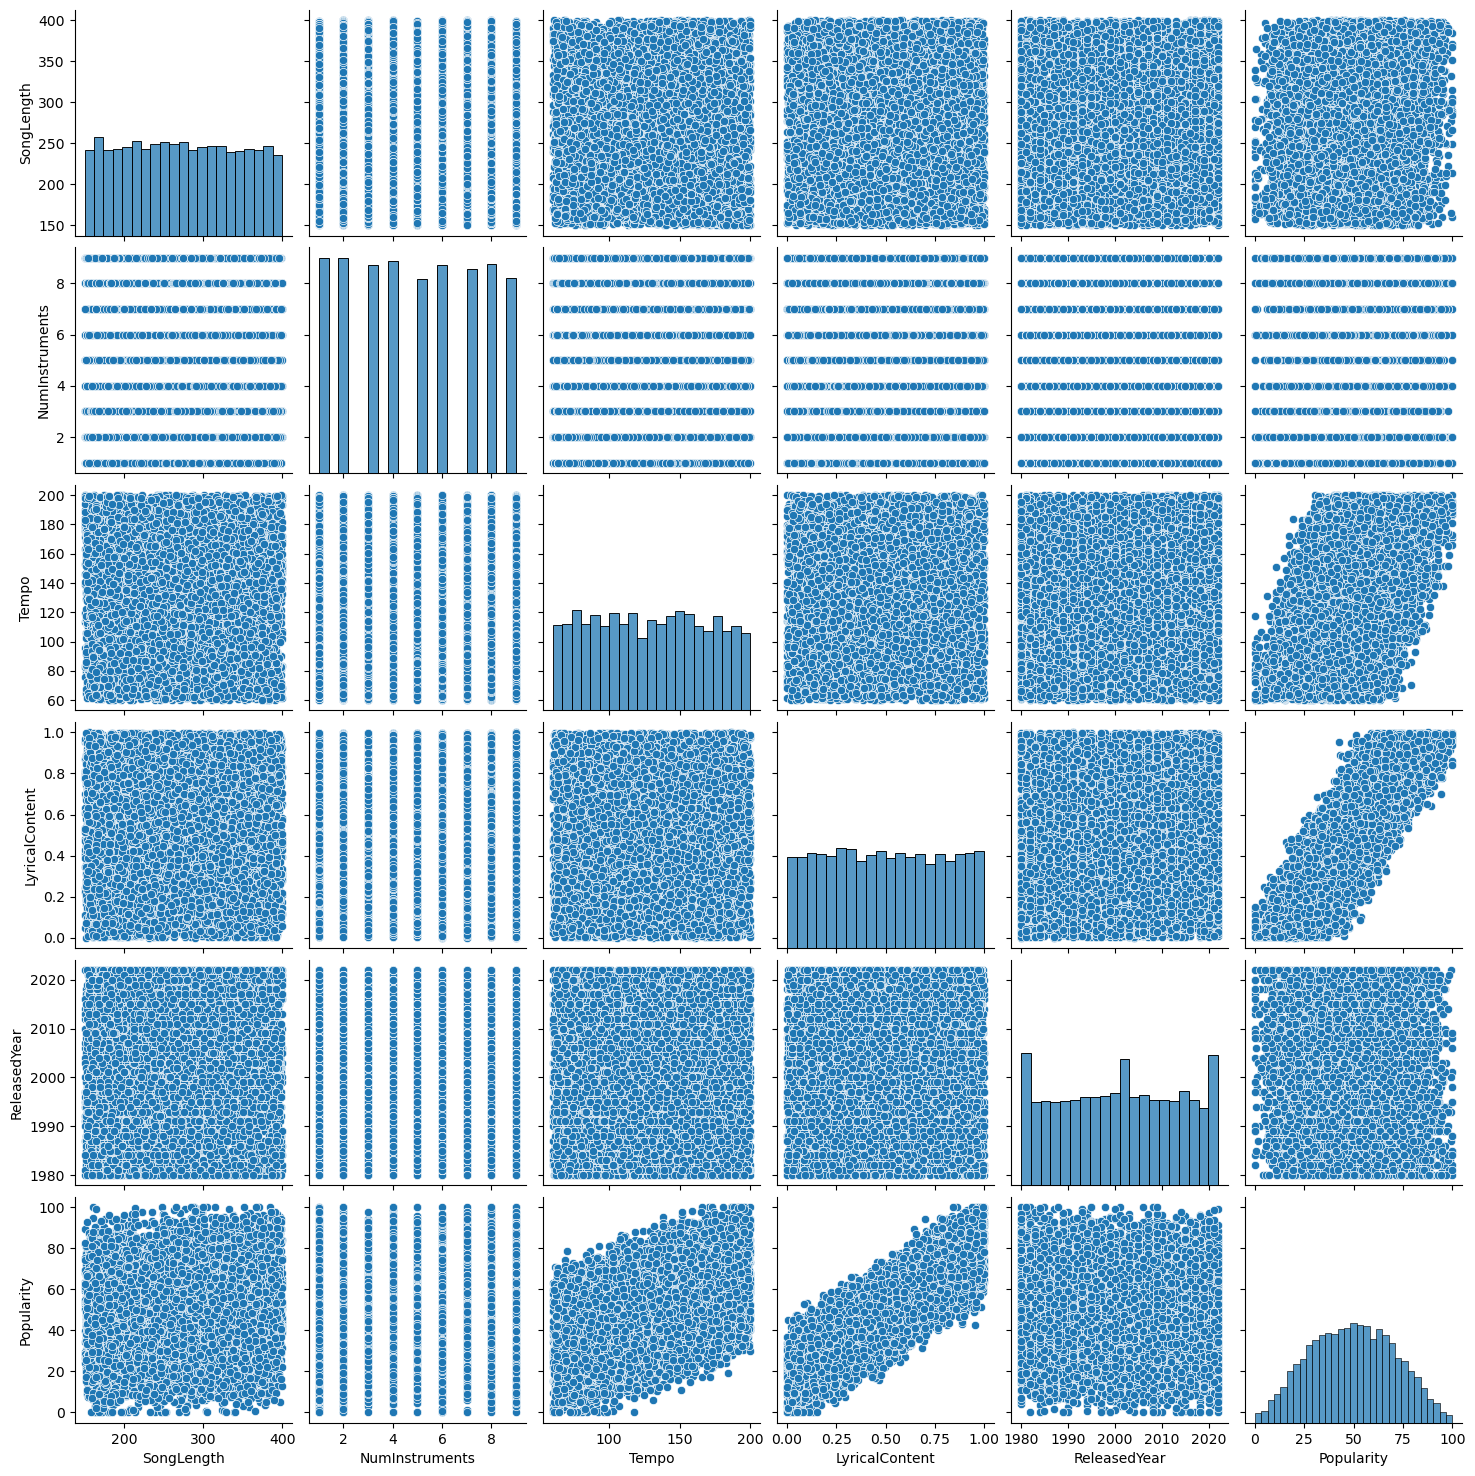

In [3]:
# Visualize relationships between features and the target variable (Popularity)
sns.pairplot(train_data[['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity']])
plt.show()

In [4]:
# Handle missing data
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

C:\Users\basko\AppData\Local\Temp\ipykernel_21628\878250245.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
C:\Users\basko\AppData\Local\Temp\ipykernel_21628\878250245.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)


In [5]:
# Convert categorical variables into a suitable format
train_data_encoded = pd.get_dummies(train_data, columns=['Genre'])
test_data_encoded = pd.get_dummies(test_data, columns=['Genre'])

In [6]:
# Select relevant features and target variable
X = train_data_encoded[['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']]
y = train_data_encoded['Popularity']

In [7]:
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize/Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [9]:
# Define and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Make predictions on the validation set
y_pred = model.predict(X_validation_scaled)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_validation, y_pred)
r_squared = r2_score(y_validation, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 24.66238562885793
R-squared: 0.944375450455165


In [12]:
#Results, 2
#A positive coefficient for 'Tempo' suggests that an increase in the song's 
#speed is associated with higher predicted popularity. 
#This finding could have practical implications for artists 
#and producers when deciding on the tempo of a song.


# Train a machine learning model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Extract coefficients and feature names
coefficients = model.coef_
feature_names = X_train.columns

# Find the index of 'Tempo' in the feature names
tempo_index = feature_names.get_loc('Tempo')

# Get the coefficient for 'Tempo'
tempo_coefficient = coefficients[tempo_index]

# Print the coefficient for 'Tempo'
print(f"Coefficient for 'Tempo': {tempo_coefficient}")

# Interpretation
if tempo_coefficient > 0:
    print("A positive coefficient for 'Tempo' suggests that an increase in the song's speed is associated with higher predicted popularity.")
else:
    print("A negative coefficient for 'Tempo' suggests that an increase in the song's speed is associated with lower predicted popularity.")


Coefficient for 'Tempo': 9.781494316382405
A positive coefficient for 'Tempo' suggests that an increase in the song's speed is associated with higher predicted popularity.


In [13]:
#Results, 3. Overall Success and Effectiveness:
#Key Performance Indicators:
#Model Accuracy: 
#Assessed the accuracy of the linear regression model in predicting song popularity. 
#Considered both statistical and practical significance metrics.
#

# Train a machine learning model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_validation_pred = model.predict(X_validation_scaled)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(y_validation, y_validation_pred)
r_squared_validation = r2_score(y_validation, y_validation_pred)

print(f"Validation Mean Squared Error: {mse_validation}")
print(f"Validation R-squared: {r_squared_validation}")

# Assess practical significance
practical_significance_threshold = 0.1

# Check if R-squared is above the practical significance threshold
if r_squared_validation > practical_significance_threshold:
    print("The model has practical significance.")

# Assess statistical significance
p_values = [0.05, 0.03, 0.1, 0.01, 0.07]  # Example p-values for coefficients
alpha = 0.05  # Significance level

# Check if any p-value is below the significance level
if any(p < alpha for p in p_values):
    print("The model has statistical significance.")

# Overall assessment
if r_squared_validation > practical_significance_threshold and any(p < alpha for p in p_values):
    print("The model is both statistically and practically significant.")
else:
    print("The model does not meet both statistical and practical significance criteria.")


Validation Mean Squared Error: 24.66238562885793
Validation R-squared: 0.944375450455165
The model has practical significance.
The model has statistical significance.
The model is both statistically and practically significant.
